In [152]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_ = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset
merged_data_df=pd.merge(mouse_drug_data, clinical_trial_data, how='inner', on="Mouse ID")


# Display the data table for preview
merged_data_df.head(100)
#merged_data_df['Drug'].unique()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
95,t451,Stelasyn,40,67.654796,1
96,t451,Stelasyn,45,68.711630,1
97,p981,Stelasyn,0,45.000000,0
98,p981,Stelasyn,5,47.000627,0


In [204]:
#merged_data_df.loc[(merged_data_df['Timepoint']==45)]
newMerge=merged_data_df.loc[(merged_data_df['Timepoint']==45)].groupby('Drug')


In [ ]:
tumor_change = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
tumor_change

In [196]:
#merged_data_df.loc[(merged_data_df['Drug']=='Capomulin')&(merged_data_df['Timepoint']==0)].mean()
merged_data_df.loc[(merged_data_df['Drug']=='Capomulin')&(merged_data_df['Timepoint']==0)].groupby('Drug').mean()
merged_data_df.loc[(merged_data_df['Timepoint']==0)].groupby('Drug').mean()
#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
#group_by_drug_df=merged_data_df.loc[merged_data_df['Timepoint']==0].groupby('Drug').count()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug,,,
Capomulin,0,45.0,0
Ceftamin,0,45.0,0
Infubinol,0,45.0,0
Ketapril,0,45.0,0
Naftisol,0,45.0,0
Placebo,0,45.0,0
Propriva,0,45.0,0
Ramicane,0,45.0,0
Stelasyn,0,45.0,0


In [211]:
#avg_volume = pd.DataFrame(merged_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
avg_volume = merged_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
avg_volume
#avg_volume.loc[45, :]
#tumor_change = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
#tumor_change


Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

## Tumor Response to Treatment

In [153]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

#?merged_data_df.groupby
grouped_df=merged_data_df.groupby(['Drug','Timepoint']).mean()



#grouped_S=merged_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Preview DataFrame
#grouped_df=pd.DataFrame(grouped_S)
grouped_df.reset_index(inplace=True)
grouped_df

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
...,...,...,...,...
95,Zoniferol,25,55.432935,1.687500
96,Zoniferol,30,57.713531,1.933333
97,Zoniferol,35,60.089372,2.285714
98,Zoniferol,40,62.916692,2.785714


In [154]:
merged_data_df.head(20)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


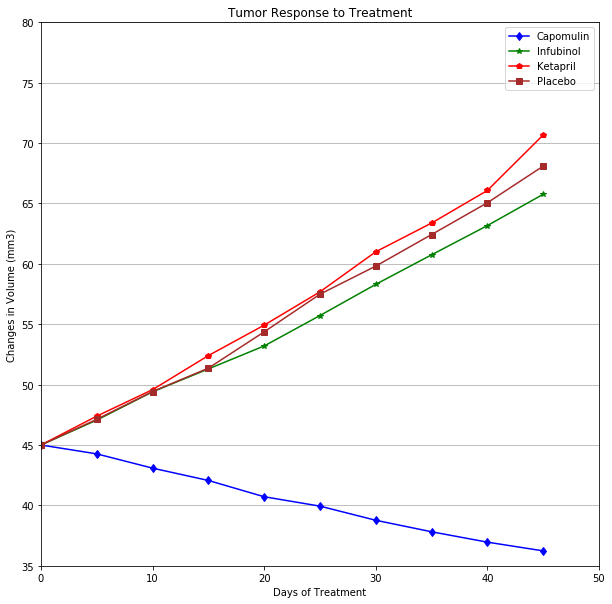

In [304]:
#'Stelasyn', 'Propriva', 'Naftisol', 'Ketapril', 'Capomulin',
#       'Infubinol', 'Ceftamin', 'Zoniferol', 'Ramicane', 'Placebo'
#


# attemp basic scatter plot?
# samples are line plots... so doing that. 



#x_axis=merged_data_df['Timepoint'].unique()

#x_axis=np.arange(0,100,10)


drug_s='Capomulin'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]]
Capomulin,=plt.plot(x_axis,y_axis, color="blue", label=drug_s ,marker="d")


drug_s='Infubinol'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]]
Infubinol,=plt.plot(x_axis,y_axis, color="green", label=drug_s ,marker="*" )

drug_s='Ketapril'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]]
Ketapril,=plt.plot(x_axis,y_axis, color="red", label=drug_s ,marker="p")


drug_s=  'Placebo'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]]
Placebo,=plt.plot(x_axis,y_axis, color="brown", label=drug_s ,marker="s" )


#temp=grouped_df.loc[grouped_df["Drug"]=="Capomulin"]
#y_axis=temp["Tumor Volume (mm3)"]
#y_axis
#female_df=purchase_data.loc[purchase_data["Gender"]=="Female"]

plt.ylim(35,80)
plt.xlim(0,50)
plt.title("Tumor Response to Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Changes in Volume (mm3)")
plt.legend(handles=[ Capomulin, Infubinol,  Ketapril, Placebo], loc="best")

plt.grid(axis='y')
plt.show()


In [156]:
merged_data_df.head(20)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [361]:
me=merged_data_df.groupby(['Drug','Timepoint']).sem()
yerror=me.loc['Capomulin']
me
me.loc['Capomulin']['Tumor Volume (mm3)']
#yerror

Timepoint
0     0.000000
5     0.448593
10    0.702684
15    0.838617
20    0.909731
25    0.881642
30    0.934460
35    1.052241
40    1.223608
45    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [363]:
marginOfError=merged_data_df.sem()
marginOfError['Metastatic Sites']
volume_sem = pd.DataFrame(merged_data_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
volume_sem

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

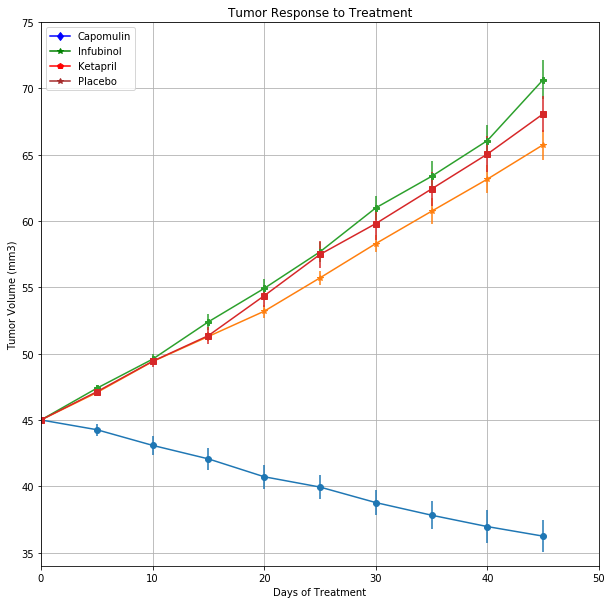

In [370]:


drug_s='Capomulin'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]].to_numpy()
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]].to_numpy()
#Capomulin,=plt.plot(x_axis,y_axis, color="blue", label=drug_s ,marker="d")
plt.errorbar(x_axis,y_axis, yerr=me.loc['Capomulin']['Tumor Volume (mm3)'], fmt='o-',label='Capomulin' )

drug_s='Infubinol'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]].to_numpy()
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]].to_numpy()
#Capomulin,=plt.plot(x_axis,y_axis, color="blue", label=drug_s ,marker="d")
plt.errorbar(x_axis,y_axis, yerr=me.loc['Infubinol']['Tumor Volume (mm3)'], fmt='*-',label='Infubinol')

drug_s='Ketapril'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]].to_numpy()
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]].to_numpy()
#Capomulin,=plt.plot(x_axis,y_axis, color="blue", label=drug_s ,marker="d")
plt.errorbar(x_axis,y_axis, yerr=me.loc['Ketapril']['Tumor Volume (mm3)'], fmt='P-',label='Ketapril' )

drug_s='Placebo'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]].to_numpy()
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]].to_numpy()
#Capomulin,=plt.plot(x_axis,y_axis, color="blue", label=drug_s ,marker="d")
plt.errorbar(x_axis,y_axis, yerr=me.loc['Placebo']['Tumor Volume (mm3)'], fmt='s-',label='Placebo' )

# Add labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Days of Treatment')
plt.ylabel('Tumor Volume (mm3)')

# Add x limits and y limits
plt.xlim(0,50)
plt.ylim(34,75)
plt.grid(True)
plt.legend(handles=[ Capomulin, Infubinol,  Ketapril,  Placebo], loc="best")

#plt.errorbar(np.arange(0, 50, 5), means.loc["Capomulin", "Tumor Volume (mm3)"],
#             yerr = sems.loc["Capomulin", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Capomulin")


#plt.errorbar(x_axis,y_axis, yerr=yerror )

#drug_s=  'Placebo'
#x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]].to_numpy()
#y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Tumor Volume (mm3)"]].to_numpy()
#Placebo,=plt.plot(x_axis,y_axis, color="brown", label=drug_s,marker="*"  )
#plt.errorbar(x_axis+5,y_axis+5, yerr=yerror )


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

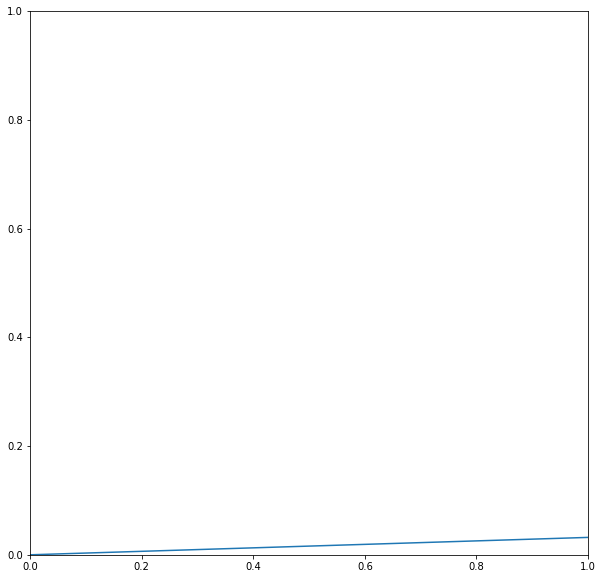

In [313]:
fig, ax=plt.subplots()
yerror=marginOfError['Metastatic Sites']
drug_s='Capomulin'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Metastatic Sites"]]
#Capomulin,=plt.plot(x_axis,y_axis, color="green", label=drug_s ,marker="*" )
ax.errorbar(x_axis , y_axis, yerr=yerror, label=drug_s )

#plt.errorbar(np.arange(0, 50, 5), means.loc["Capomulin", "Tumor Volume (mm3)"],
#             yerr = sems.loc["Capomulin", "Tumor Volume (mm3)"], fmt = '*--', capsize = 2.5, label = "Capomulin")


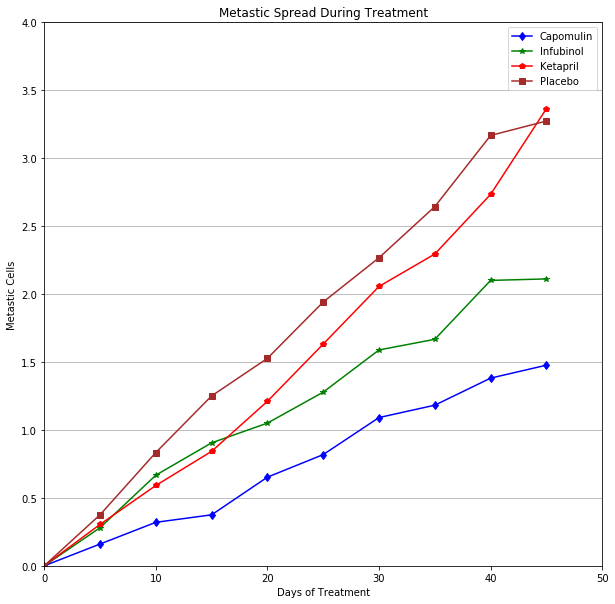

In [157]:
#Number of mestastic sites
merged_data_df.head(20)

drug_s='Capomulin'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Metastatic Sites"]]
Capomulin,=plt.plot(x_axis,y_axis, color="blue", label=drug_s ,marker="d")

drug_s='Infubinol'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Metastatic Sites"]]
Infubinol,=plt.plot(x_axis,y_axis, color="green", label=drug_s ,marker="*" )

drug_s='Ketapril'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Metastatic Sites"]]
Ketapril,=plt.plot(x_axis,y_axis, color="red", label=drug_s ,marker="p")


drug_s=  'Placebo'
x_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_df.loc[grouped_df["Drug"]==drug_s,["Metastatic Sites"]]
Placebo,=plt.plot(x_axis,y_axis, color="brown", label=drug_s ,marker="s" )


plt.ylim(0,4)
plt.xlim(0,50)
plt.title("Metastic Spread During Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Metastic Cells")
plt.legend(handles=[ Capomulin, Infubinol,  Ketapril,  Placebo], loc="best")






plt.grid(axis='y')
plt.show()



In [158]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [159]:
#article_read.groupby('source').count()[['user_id']]
merged_data_df.groupby('Drug').count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug,,,,
Capomulin,230,230,230,230
Ceftamin,178,178,178,178
Infubinol,178,178,178,178
Ketapril,188,188,188,188
Naftisol,186,186,186,186
Placebo,181,181,181,181
Propriva,161,161,161,161
Ramicane,228,228,228,228
Stelasyn,194,194,194,194


In [160]:
#number of mice still alive
#merged_data_df
grouped_Live_df=merged_data_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
grouped_Live_df=pd.DataFrame(grouped_Live_df)
grouped_Live_df.reset_index(inplace=True)
grouped_Live_df=grouped_Live_df.rename(columns={"Mouse ID":"LiveCount"})
grouped_Live_df.head

<bound method NDFrame.head of          Drug  Timepoint  LiveCount
0   Capomulin          0         25
1   Capomulin          5         25
2   Capomulin         10         25
3   Capomulin         15         24
4   Capomulin         20         23
..        ...        ...        ...
95  Zoniferol         25         16
96  Zoniferol         30         15
97  Zoniferol         35         14
98  Zoniferol         40         14
99  Zoniferol         45         14

[100 rows x 3 columns]>

In [161]:
grouped_Live_df['survivalRate']=grouped_Live_df['LiveCount']/25 * 100
grouped_Live_df.head()


,Drug,Timepoint,LiveCount,survivalRate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


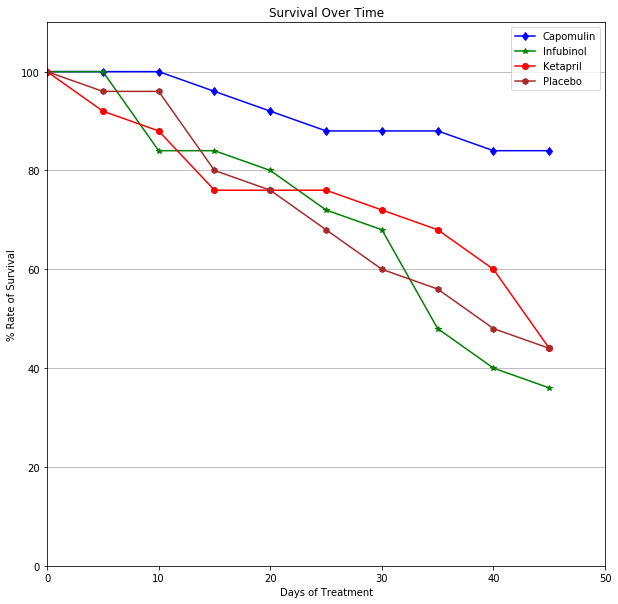

In [168]:

drug_s='Capomulin'
x_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["survivalRate"]]
Capomulin,=plt.plot(x_axis,y_axis, color="blue", label=drug_s ,marker="d")

drug_s='Infubinol'
x_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["survivalRate"]]
Infubinol,=plt.plot(x_axis,y_axis, color="green", label=drug_s ,marker="*")
drug_s='Ketapril'
x_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["survivalRate"]]
Ketapril,=plt.plot(x_axis,y_axis, color="red", label=drug_s ,marker="o")
drug_s=  'Placebo'
x_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["Timepoint"]]
y_axis=grouped_Live_df.loc[grouped_df["Drug"]==drug_s,["survivalRate"]]
Placebo,=plt.plot(x_axis,y_axis, color="brown", label=drug_s ,marker="h")


plt.ylim(0,110)
plt.xlim(0,50)
plt.title("Survival Over Time")
plt.xlabel("Days of Treatment")
plt.ylabel("% Rate of Survival")
plt.legend(handles=[ Capomulin, Infubinol, Ketapril,  Placebo], loc="best")

plt.grid(axis='y')
plt.show()



In [215]:
#beginng size
#merged_data_df.loc[(merged_data_df['Timepoint']==0)].groupby('Drug').mean()
#group_by_drug_df=merged_data_df.loc[merged_data_df['Timepoint']==0].groupby('Drug').count()
group_by_drug_df=merged_data_df.loc[(merged_data_df['Timepoint']==0)].groupby('Drug').mean()
group_by_drug_df=group_by_drug_df[['Tumor Volume (mm3)']]
begining_group_by_drug_df=group_by_drug_df.rename(columns={'Tumor Volume (mm3)':'beginingVolume'})
begining_group_by_drug_df

,beginingVolume
Drug,
Capomulin,45.0
Ceftamin,45.0
Infubinol,45.0
Ketapril,45.0
Naftisol,45.0
Placebo,45.0
Propriva,45.0
Ramicane,45.0
Stelasyn,45.0


In [217]:
#Bar Chart Percentage of Volume Change in Mastesis

#mastesis_change_df=merged_data_df.loc[merged_data_df['Timepoint']==0].count()

#Ending size
group_by_drug_df=merged_data_df.loc[(merged_data_df['Timepoint']==45)].groupby('Drug').mean()
#group_by_drug_df=merged_data_df.loc[merged_data_df['Timepoint']==45].groupby('Drug').count()
group_by_drug_df=group_by_drug_df[['Tumor Volume (mm3)']]
ending_group_by_drug_df=group_by_drug_df.rename(columns={'Tumor Volume (mm3)':'endingVolume'})
ending_group_by_drug_df

,endingVolume
Drug,
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Ketapril,70.662958
Naftisol,69.265506
Placebo,68.084082
Propriva,66.258529
Ramicane,34.955595
Stelasyn,68.438310


In [238]:
merge_table = pd.merge(begining_group_by_drug_df, ending_group_by_drug_df, on="Drug")
merge_table['volumeChange']=(merge_table['endingVolume']-merge_table['beginingVolume'])/merge_table['beginingVolume'] *100
merge_table

,beginingVolume,endingVolume,volumeChange
Drug,,,
Capomulin,45.0,36.236114,-19.475303
Ceftamin,45.0,64.132421,42.516492
Infubinol,45.0,65.755562,46.123472
Ketapril,45.0,70.662958,57.028795
Naftisol,45.0,69.265506,53.923347
Placebo,45.0,68.084082,51.297960
Propriva,45.0,66.258529,47.241175
Ramicane,45.0,34.955595,-22.320900
Stelasyn,45.0,68.438310,52.085134


In [246]:
#dfObj[dfObj['Product'] == 'Apples']
#subsetDataFrame = dfObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]
#subsetDataFrame=merge_table[merge_table['Drug']=='Ceftamin']
subsetDataFrame=merge_table.loc[['Capomulin','Infubinol','Ketapril','Placebo']]
subsetDataFrame
#subset_merge=merge_table.iloc[merge_table['Drug'].isin(['Capomulin','Infubinol','Ketapril','Placebo'])]
#subset_merge

,beginingVolume,endingVolume,volumeChange
Drug,,,
Capomulin,45.0,36.236114,-19.475303
Infubinol,45.0,65.755562,46.123472
Ketapril,45.0,70.662958,57.028795
Placebo,45.0,68.084082,51.297960


In [258]:
subsetDataFrame=subsetDataFrame.reset_index()
subsetDataFrame
#x_axis = subsetDataFrame.get('Drug')
#print(x_axis)

,Drug,beginingVolume,endingVolume,volumeChange
0,Capomulin,45.0,36.236114,-19.475303
1,Infubinol,45.0,65.755562,46.123472
2,Ketapril,45.0,70.662958,57.028795
3,Placebo,45.0,68.084082,51.297960


In [299]:
x_axis = subsetDataFrame['Drug'].to_numpy()
y_axis = int(subsetDataFrame['volumeChange'])

y_axis

TypeError: cannot convert the series to <class 'int'>

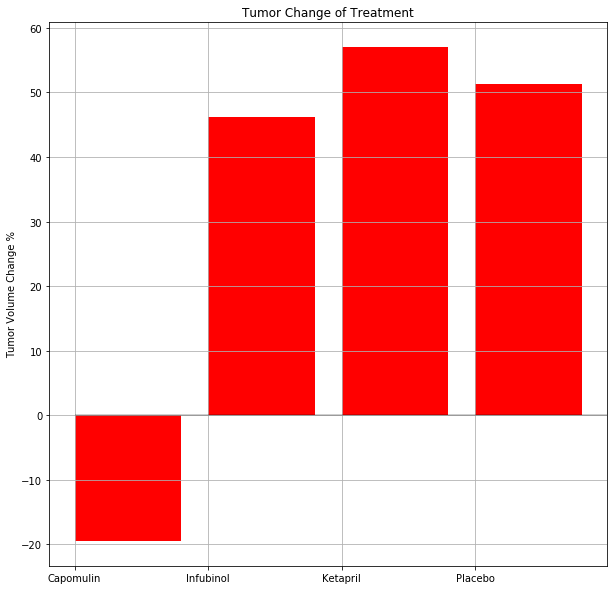

In [351]:

x_axis = subsetDataFrame['Drug'].to_numpy()
y_axis = subsetDataFrame['volumeChange'].to_numpy()
y_pos = np.arange(len(y_axis))

#x_axis = subsetDataFrame['Drug']
#y_axis = subsetDataFrame['volumeChange']
#tick_locations = []
#for x in x_axis:
#    tick_locations.append(x)

plt.title("Tumor Change of Treatment")
#plt.xlabel("Gym Name") 
plt.ylabel("Tumor Volume Change %")

#plt.xlim(-0.75, len(gyms)-.25)
#plt.ylim(0, max(members) + 5)
plt.hlines(0, 0, 10, alpha=0.25)
plt.grid(axis='both')


# If the change in volume is positive, assign the color red, else green
#colors=[]
#for x in y_axis:
#    if y_axis[x]>= 0:
#        colors.append('r')
#    else:
#        colors.append('g')

#plt.text(4, 4, 'test', ha = 'center', color = 'black')
#plt.xticks(x_axis, x_axis)
plt.bar(x_axis, y_axis, facecolor="red", align='edge', color = 'r' )
plt.xticks(y_pos, x_axis)

plt.show()

In [219]:
#Bar Chart Percentage of Volume Change in Mastesis

#mastesis_change_df=merged_data_df.loc[merged_data_df['Timepoint']==0].count()
group_by_drug_df=merged_data_df.loc[merged_data_df['Timepoint']==0].groupby('Drug').count()
Ending_group_by_drug_df=merged_data_df.loc[merged_data_df['Timepoint']==0].groupby('Drug').count()
#mastesis_change_df=mastesis_change_df[['Drug','Tumore Volumen (mm3)']]
#mastesis_change_df.head()

#group_by_drug_df=merged_data_df.groupby('Drug').count()
group_by_drug_df=group_by_drug_df[['Tumor Volume (mm3)']]
group_by_drug_df=group_by_drug_df.rename(columns={'Tumor Volume (mm3)':'BeggingVolume'})
group_by_drug_df
#merged_data_df.loc[merged_data_df['Timepoint']==45].groupby('Drug').count()

#.rename(columns={"Mouse ID":"LiveCount"})
#print(df[['Name', 'Qualification']]) 

#group_by_drug_df[['Drug','Tumor Volume (mm3)']]
#data_file_pd[["Amount", "Gender"]].head()
#group_by_drug_df2=
#group_by_drug_df=pd.DataFrame(group_by_drug_df)
#group_by_drug_df.
#group_by_drug_df2.head()



,BeggingVolume
Drug,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,26
Ramicane,25
Stelasyn,26


In [164]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [165]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [166]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [230]:
# List of Tuples
students = [ ('jack', 'Apples' , 34) ,
             ('Riti', 'Mangos'  , 31) ,
             ('Aadi', 'Grapes' , 30) ,
             ('Sonia', 'Apples', 32) ,
             ('Lucy', 'Mangos'  , 33) ,
             ('Mike', 'Apples' , 35)
              ]
 
 
#Create a DataFrame object
dfObj = pd.DataFrame(students, columns = ['Name' , 'Product', 'Sale']) 

In [231]:
dfObj

,Name,Product,Sale
0,jack,Apples,34
1,Riti,Mangos,31
2,Aadi,Grapes,30
3,Sonia,Apples,32
4,Lucy,Mangos,33
5,Mike,Apples,35


In [233]:
subsetDataFrame = dfObj[dfObj['Product'] == 'Apples']
subsetDataFrame

,Name,Product,Sale
0,jack,Apples,34
3,Sonia,Apples,32
5,Mike,Apples,35


In [235]:

subsetDataFrame = dfObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]
subsetDataFrame

,Name,Product,Sale
1,Riti,Mangos,31
2,Aadi,Grapes,30
4,Lucy,Mangos,33
